# **Coffee Shop Analysis Project**

In [ ]:
import pandas as pd
import numpy as np
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
con = mysql.connector.connect(
    host='localhost',
    user='root',
    password='@1234',
)
cur = con.cursor()
q1="CREATE DATABASE IF NOT EXISTS order_analysis"
cur.execute(q1)
cur.execute("USE order_analysis")
con.commit()

In [13]:
df=pd.read_csv('/Coffee Shop Sales.csv')
df.head(20)

,transaction_id,transaction_date,Month,Day Name,transaction_time,hour,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Total bill,size
0,1,1/1/2023,January,Sunday,07:06:11 AM,7,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia,$6.00,Regular
1,2,1/1/2023,January,Sunday,07:08:56 AM,7,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai,$6.20,Large
2,3,1/1/2023,January,Sunday,07:14:04 AM,7,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate,$9.00,Large
3,4,1/1/2023,January,Sunday,07:20:24 AM,7,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend,$2.00,Small
4,5,1/1/2023,January,Sunday,07:22:41 AM,7,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai,$6.20,Large
5,6,1/1/2023,January,Sunday,07:22:41 AM,7,1,5,Lower Manhattan,77,3.00,Bakery,Scone,Oatmeal Scone,$3.00,Unknown
6,7,1/1/2023,January,Sunday,07:25:49 AM,7,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend,$2.00,Small
7,8,1/1/2023,January,Sunday,07:33:34 AM,7,2,5,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast,$4.00,Small
8,9,1/1/2023,January,Sunday,07:39:13 AM,7,1,5,Lower Manhattan,39,4.25,Coffee,Barista Espresso,Latte,$4.25,Regular
9,10,1/1/2023,January,Sunday,07:39:34 AM,7,2,5,Lower Manhattan,58,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate,$7.00,Regular


In [15]:
df['product_category'].unique()

array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Flavours',
       'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
      dtype=object)

In [16]:
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(' ','_')
df.head()

,transaction_id,transaction_date,month,day_name,transaction_time,hour,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_bill,size
0,1,1/1/2023,January,Sunday,07:06:11 AM,7,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia,$6.00,Regular
1,2,1/1/2023,January,Sunday,07:08:56 AM,7,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai,$6.20,Large
2,3,1/1/2023,January,Sunday,07:14:04 AM,7,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate,$9.00,Large
3,4,1/1/2023,January,Sunday,07:20:24 AM,7,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend,$2.00,Small
4,5,1/1/2023,January,Sunday,07:22:41 AM,7,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai,$6.20,Large


In [18]:
df['transaction_date']=pd.to_datetime(df['transaction_date'],format="%m/%d/%Y")
df.dtypes

,0
transaction_id,int64
transaction_date,datetime64[ns]
month,object
day_name,object
transaction_time,object
hour,int64
transaction_qty,int64
store_id,int64
store_location,object
product_id,int64


# Data **Visualization**

1. What is sales trend over time?

In [ ]:
query = """
SELECT City, SUM(sale_price) AS total_revenue
FROM order_table
GROUP BY City
ORDER BY total_revenue DESC
LIMIT 5;
"""

cur.execute(query)
data = cur.fetchall()

# Create DataFrame
d = pd.DataFrame(data, columns=["store_location", "total_bill"])

# Display DataFrame
display(d)

# Plotting
plt.figure(figsize=(6,4))
plt.bar(d["store_location"], d["total_bill"], color="skyblue")
plt.title("Top 5 Cities by Revenue")
plt.xlabel("store_location")
plt.ylabel("total_bill")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

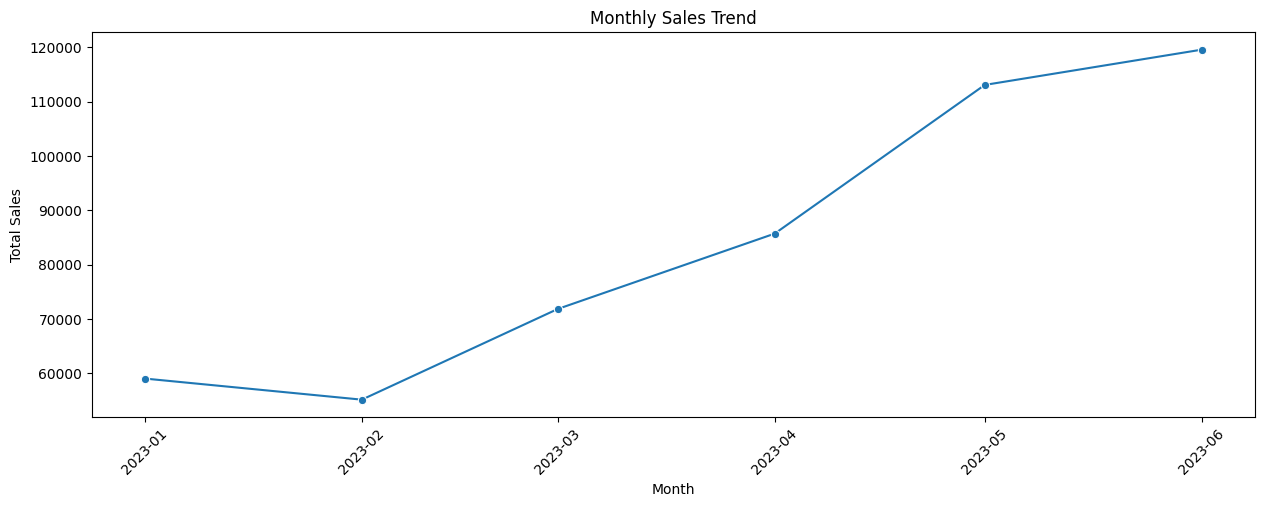

In [26]:
sales_trend = df.groupby(df['transaction_date'].dt.to_period('M'))['unit_price'].sum().reset_index()
# display(sales_trend)  #2022-02
sales_trend['transaction_date'] = sales_trend['transaction_date'].dt.to_timestamp()

plt.figure(figsize=(15, 5))
sns.lineplot(data=sales_trend, x='transaction_date', y='unit_price', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

plt.show()
# sales_trend

Generated a line plot to visualize monthly sales trends, helping reveal seasonal variations and growth patterns across the timeline.

revenue trends over time, indicating periods of high and low sales activity.

2. Which categories and sub-categories contribute most to the sales?

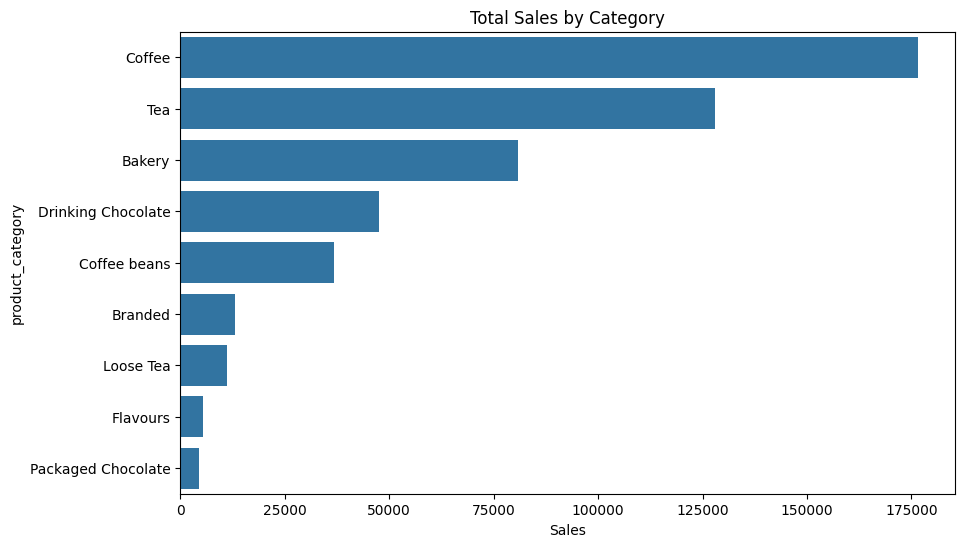

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df.groupby('product_category')['unit_price'].sum().reset_index().sort_values('unit_price', ascending=False),
            x='unit_price', y='product_category')
plt.title('Total Sales by Category')
plt.xlabel('Sales')
plt.ylabel('product_category')
plt.show()


conclusion

Based on the analysis and visualizations, we can draw the following conclusions:

coffee is the most sold product in the following financail year.


3. How Profit is distributed among different stores.


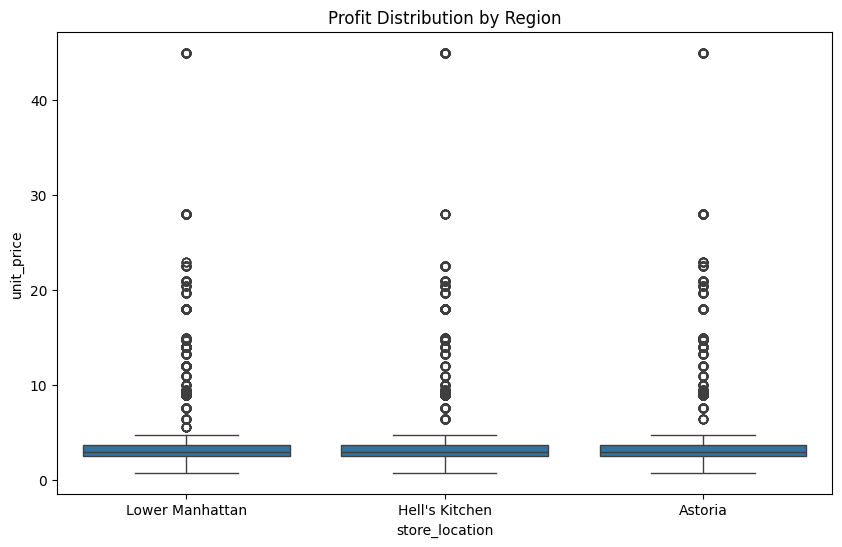

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='store_location', y='unit_price')
plt.title('Profit Distribution by Region')
plt.xlabel('store_location')
plt.ylabel('unit_price')
plt.show()

4.Top cities by total sales.

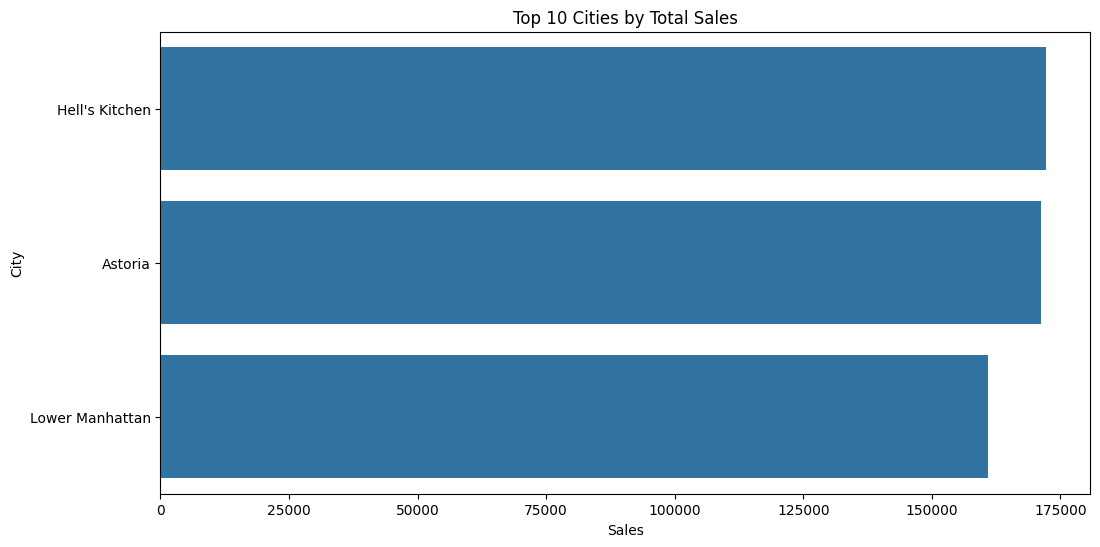

,store_location,unit_price
0,Hell's Kitchen,172205.67
1,Astoria,171272.41
2,Lower Manhattan,160864.95


In [37]:
top_cities = df.groupby('store_location')['unit_price'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities, x='unit_price', y='store_location')
plt.title('Top 10 Cities by Total Sales')
plt.xlabel('Sales')
plt.ylabel('City')
plt.show()
top_cities

5. Distribution of Sales price.

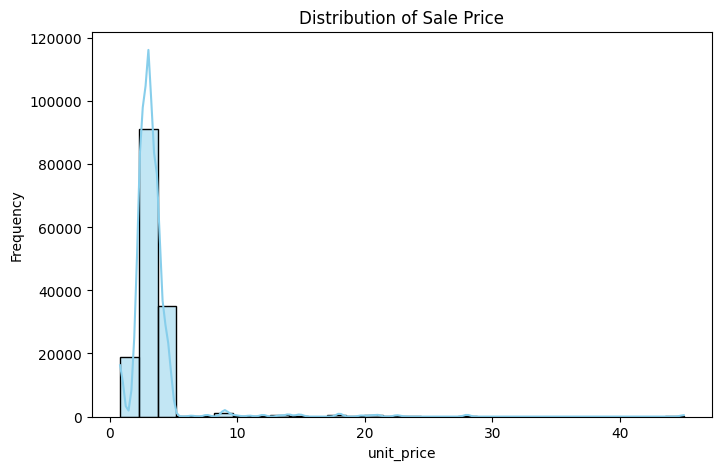

In [39]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='unit_price', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sale Price')
plt.xlabel('unit_price')
plt.ylabel('Frequency')
plt.show()

6. Pie chart of sales by store location

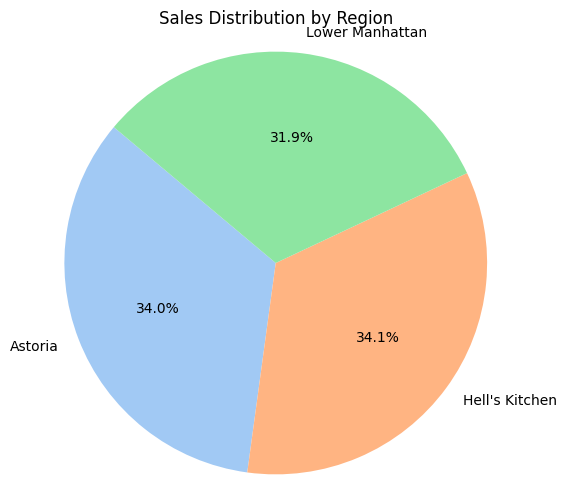

In [40]:
region_sales = df.groupby('store_location')['unit_price'].sum()

plt.figure(figsize=(6, 6))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Sales Distribution by Region')
plt.axis('equal')
plt.show()

7. Correlation Heat Map

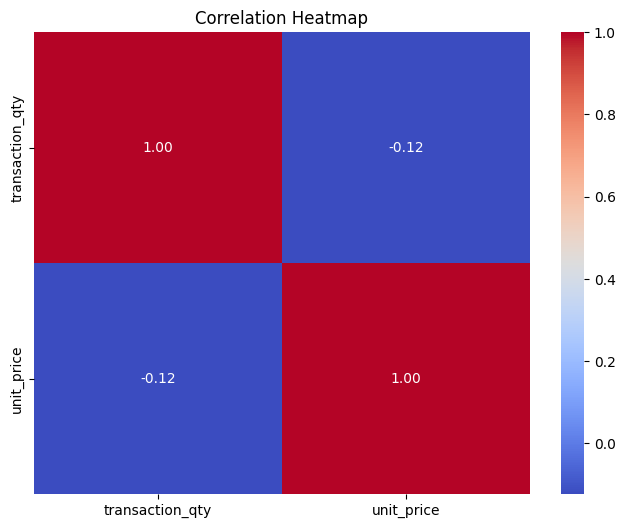

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['transaction_qty','unit_price']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# **Conclusion**

The analysis of the retail orders dataset provided valuable insights into sales trends, customer preferences, and regional performance. Key findings include:

The overall sales trend showed consistent growth over time, with certain months experiencing spikes in sales.
The top 5 cities contributing to sales were New York, Los Angeles, Chicago, Houston, and Philadelphia.
Standard Class was the most common shipping mode, indicating customer preference for this option.
The West region had the highest sales, while the South region showed variability in profit.
A positive correlation was found between sales and profit, suggesting that higher sales generally lead to higher profits.